[![Open In Colab](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/badge/open-in-colab.svg)](https://colab.research.google.com/github/crunchdao/quickstarters/blob/master/competitions/datacrunch-2/quickstarters/financial-eda-deep-dive/financial-eda-deep-dive.ipynb)

![Banner](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/competitions/datacrunch-2/assets/banner.webp)

# Financial EDA Deep Dive

**Dataset Overview:**
- **X_local.parquet**: Features (id, moon, Feature_1 to Feature_1150) - Features are quantized in 7 bins [0.0, 0.17, 0.33, 0.5, 0.67, 0.83, 1.0].
- **y_local.parquet**: Targets (id, moon, target) - The target contains values from -1 to 1 and are derived from the 28 days forwards returns of the stocks.
- **Key Insights from Pre-Analysis:** 781 moons (weekly, approximately 15y), ~2,000 stocks/moon, target highly skewed.

**Notes:** Large data → Use `df_sample` (5% ~80k rows) for plots/correlations. Full stats on `df`.

# Setup

The first steps to get started are:
1. Get the setup command
2. Execute it in the cell below

### >> https://hub.crunchdao.com/competitions/datacrunch-2/submit/notebook

![Reveal token](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/animations/reveal-token.gif)

In [ ]:
# Install the Crunch CLI
%pip install --upgrade crunch-cli

# Setup your local environment
!crunch setup --notebook datacrunch hello --token aaaabbbbccccddddeeeeffff

## Imports

In [2]:
# Imports & Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

print('Libraries loaded.')

Libraries loaded.


## Loading the Data

In [3]:
# Load & Merge Data
X_path = 'data/X.reduced.parquet'
y_path = 'data/y.reduced.parquet'

print('Loading X...')
X = pd.read_parquet(X_path)
print(f'X shape: {X.shape}')

print('Loading y...')
y = pd.read_parquet(y_path)
print(f'y shape: {y.shape}')

print('Merging...')
df = X.merge(y, on=['id', 'moon'], how='inner')
print(f'Merged DF shape: {df.shape}')
print(f'Memory usage: {df.memory_usage(deep=True).sum() / 1e9:.2f} GB')

# Sample for plots
df_sample = df.sample(frac=0.05, random_state=42)
print(f'Sample shape: {df_sample.shape}')

Loading X...
X shape: (1637276, 1152)
Loading y...
y shape: (1637276, 3)
Merging...
Merged DF shape: (1637276, 1153)
Memory usage: 7.55 GB
Sample shape: (81864, 1153)


# Data Overview

In [4]:
# Basic Info
print('DF Info:')
df.info()

print('\nShape:', df.shape)
print('Dtypes:\n', df.dtypes.value_counts())

print('\nHead:')
display(df.head())

print('\nTail:')
display(df.tail())

print('\nDescribe:')
display(df.describe())

print('\nDuplicates:', df.duplicated().sum())

DF Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637276 entries, 0 to 1637275
Columns: 1153 entries, id to target
dtypes: float32(1151), int32(2)
memory usage: 7.0 GB

Shape: (1637276, 1153)
Dtypes:
 float32    1151
int32         2
Name: count, dtype: int64

Head:


,id,moon,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_1142,Feature_1143,Feature_1144,Feature_1145,Feature_1146,Feature_1147,Feature_1148,Feature_1149,Feature_1150,target
0,1309,1,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.17,...,0.67,0.00,0.00,0.00,0.00,0.33,0.50,0.50,0.67,0.0
1,621,1,0.83,0.83,0.83,0.83,0.83,0.83,0.83,1.00,...,0.67,0.17,0.17,0.17,0.17,0.50,0.67,0.67,0.67,0.0
2,1855,1,0.83,0.83,0.83,0.83,0.83,0.83,0.83,0.33,...,0.50,0.83,0.83,0.83,0.83,1.00,0.33,0.33,0.17,0.0
3,650,1,0.83,0.83,0.83,0.83,0.83,0.83,0.83,0.83,...,0.83,0.50,0.50,0.50,0.50,0.33,0.67,0.50,0.67,0.0
4,759,1,0.83,0.83,0.83,0.83,0.83,0.83,0.83,0.67,...,0.83,0.17,0.17,0.17,0.17,0.33,0.50,0.50,0.33,0.0



Tail:


,id,moon,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_1142,Feature_1143,Feature_1144,Feature_1145,Feature_1146,Feature_1147,Feature_1148,Feature_1149,Feature_1150,target
1637271,1636502,781,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.83,...,0.50,0.17,0.17,0.17,0.17,0.33,0.17,0.17,0.67,0.0
1637272,1636666,781,0.33,0.33,0.33,0.33,0.33,0.33,0.33,0.50,...,0.50,0.33,0.33,0.33,0.33,0.83,0.17,0.17,0.50,0.0
1637273,1636232,781,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.50,...,1.00,1.00,1.00,1.00,1.00,0.00,0.33,0.17,0.33,0.0
1637274,1636831,781,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.67,...,0.33,0.50,0.50,0.50,0.50,0.67,0.50,0.50,0.33,0.0
1637275,1636498,781,0.67,0.67,0.67,0.67,0.67,0.67,0.67,0.50,...,1.00,1.00,0.83,1.00,1.00,0.33,0.17,0.17,0.33,0.0



Describe:


,id,moon,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,...,Feature_1142,Feature_1143,Feature_1144,Feature_1145,Feature_1146,Feature_1147,Feature_1148,Feature_1149,Feature_1150,target
count,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,...,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06,1.637276e+06
mean,8.186375e+05,3.740096e+02,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,...,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,4.999989e-01,5.192280e-08
std,4.726410e+05,2.290784e+02,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,...,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.319554e-01,2.988600e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,4.093188e+05,1.660000e+02,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,...,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,3.300000e-01,0.000000e+00
50%,8.186375e+05,3.690000e+02,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,...,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,5.000000e-01,0.000000e+00
75%,1.227956e+06,5.710000e+02,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,...,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,6.700000e-01,0.000000e+00
max,1.637275e+06,7.810000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00



Duplicates: 0


# Checking Missing Values

Assess data completeness and quality. High missing % may require imputation or feature removal, affecting model performance and Pearson correlation.

In [25]:
# Missing Values
missing = df.isna().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing': missing, 'Pct': missing_pct}).sort_values('Missing', ascending=False)
print('Missing Values Summary:')
display(missing_df.head(20))

# Plot missing % for top 20
if missing.sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_df.head(20)['Pct'].plot(kind='bar')
    plt.title('Top 20 Features by Missing %')
    plt.ylabel('Missing %')
    plt.xticks(rotation=45)
    plt.show()
else:
    print('No missing values.')

Missing Values Summary:


,Missing,Pct
id,0,0.0
moon,0,0.0
Feature_1,0,0.0
Feature_2,0,0.0
Feature_3,0,0.0
Feature_4,0,0.0
Feature_5,0,0.0
Feature_6,0,0.0
Feature_7,0,0.0
Feature_8,0,0.0


No missing values.


# Target Deep Dive

In [6]:
# Target Stats
target = df['target']
print('Target Describe:')
display(target.describe())

# Additional stats
print(f'Skewness: {target.skew():.4f}')
print(f'Kurtosis: {target.kurtosis():.4f}')
print(f'Non-zero count: {(target != 0).sum()}')
print(f'Zero count: {(target == 0).sum()}')

# Quantiles
quantiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
print('Quantiles:')
display(target.quantile(quantiles))

Target Describe:


count    1.637276e+06
mean     5.192280e-08
std      2.988600e-01
min     -1.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: target, dtype: float64

Skewness: 0.0257
Kurtosis: 7.6259
Non-zero count: 193664
Zero count: 1443612
Quantiles:


0.01   -1.0000
0.05   -0.3705
0.10    0.0000
0.25    0.0000
0.50    0.0000
0.75    0.0000
0.90    0.0000
0.95    0.3530
0.99    1.0000
Name: target, dtype: float64

# Target Distribution Analysis

Understand skewness and outliers in target.

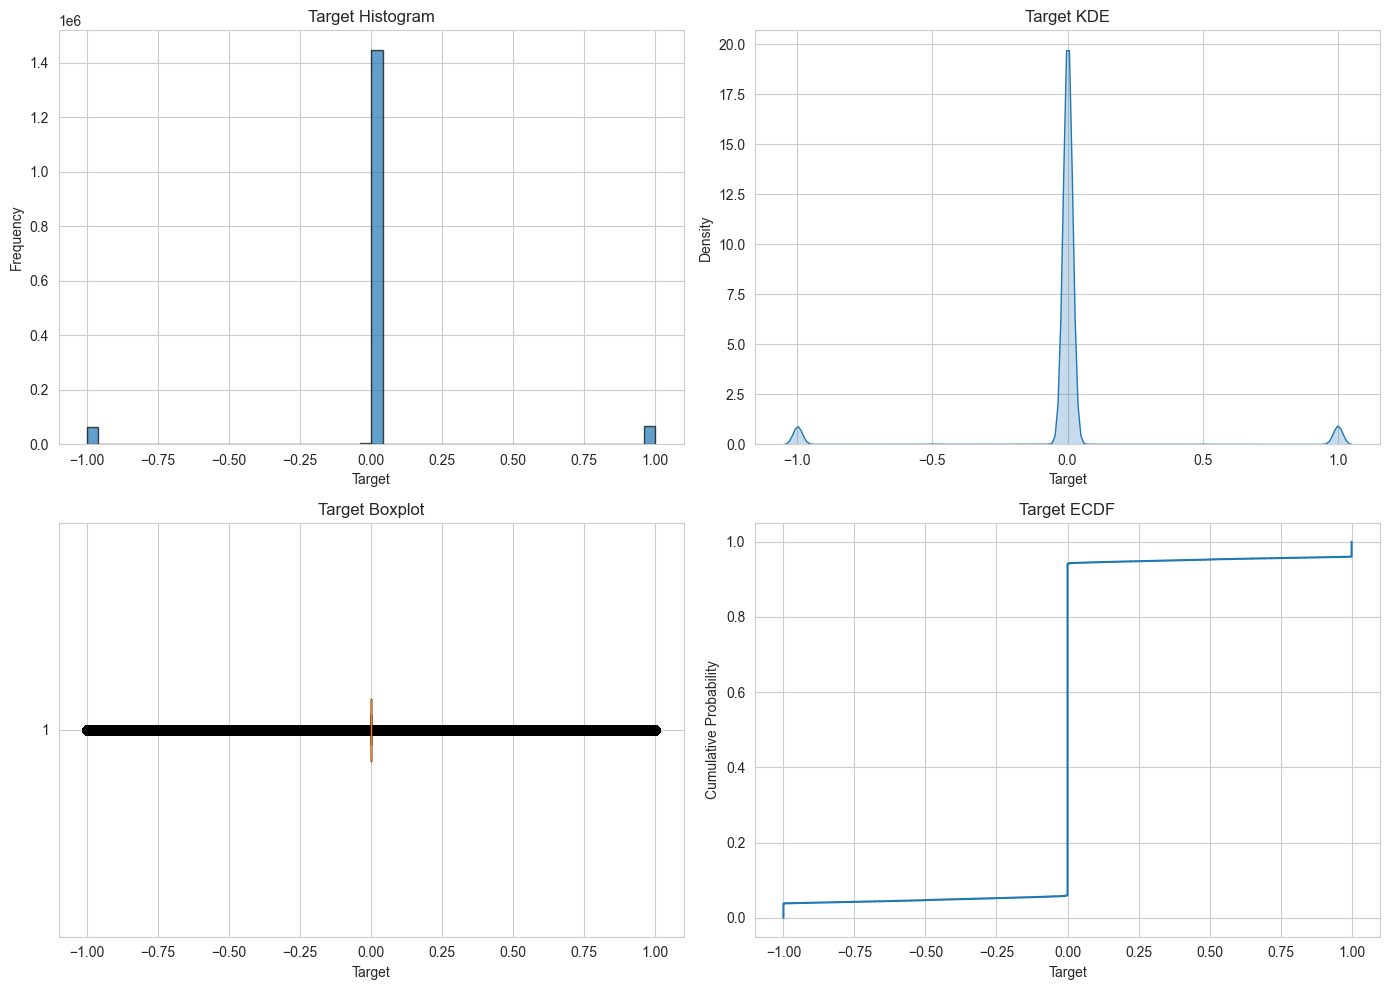

In [7]:
# Target Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0,0].hist(target, bins=50, alpha=0.7, edgecolor='black')
axes[0,0].set_title('Target Histogram')
axes[0,0].set_xlabel('Target')
axes[0,0].set_ylabel('Frequency')

# KDE
sns.kdeplot(target, ax=axes[0,1], fill=True)
axes[0,1].set_title('Target KDE')
axes[0,1].set_xlabel('Target')

# Boxplot
axes[1,0].boxplot(target, vert=False)
axes[1,0].set_title('Target Boxplot')
axes[1,0].set_xlabel('Target')

# ECDF
sorted_target = np.sort(target)
y_vals = np.arange(1, len(sorted_target)+1) / len(sorted_target)
axes[1,1].plot(sorted_target, y_vals)
axes[1,1].set_title('Target ECDF')
axes[1,1].set_xlabel('Target')
axes[1,1].set_ylabel('Cumulative Probability')

plt.tight_layout()
plt.show()

Target Deciles:


0.1    0.0
0.2    0.0
0.3    0.0
0.4    0.0
0.5    0.0
0.6    0.0
0.7    0.0
0.8    0.0
0.9    0.0
Name: target, dtype: float64

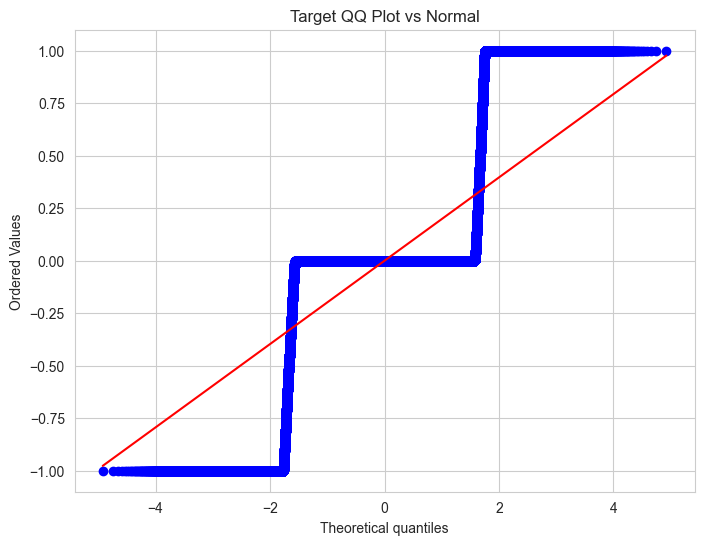

Shapiro-Wilk Test (sample): Stat=0.4486, p=0.0000
Not normal if p < 0.05.


In [8]:
# Target Bins & Normality
# Deciles
deciles = target.quantile([i/10 for i in range(1,10)])
print('Target Deciles:')
display(deciles)

# QQ Plot
plt.figure(figsize=(8, 6))
stats.probplot(target, dist='norm', plot=plt)
plt.title('Target QQ Plot vs Normal')
plt.show()

# Shapiro-Wilk (sample)
shapiro_stat, shapiro_p = stats.shapiro(target.sample(5000, random_state=42))
print(f'Shapiro-Wilk Test (sample): Stat={shapiro_stat:.4f}, p={shapiro_p:.4f}')
print('Not normal if p < 0.05.')

Target Stats Per Moon (first 10):


,mean,std,count,min,max
moon,,,,,
1,1.698829e-10,0.277498,2456,-1.0,1.0
2,1.926581e-07,0.269731,2594,-1.0,1.0
3,-4.079915e-07,0.275394,2451,-1.0,1.0
4,-1.929562e-07,0.268954,2592,-1.0,1.0
5,7.692724e-07,0.269219,2600,-1.0,1.0
6,-6.080834e-07,0.275258,2466,-1.0,1.0
7,-3.822125e-07,0.269437,2616,-1.0,1.0
8,-6.079819e-07,0.275037,2467,-1.0,1.0
9,4.553449e-11,0.267447,2618,-1.0,1.0


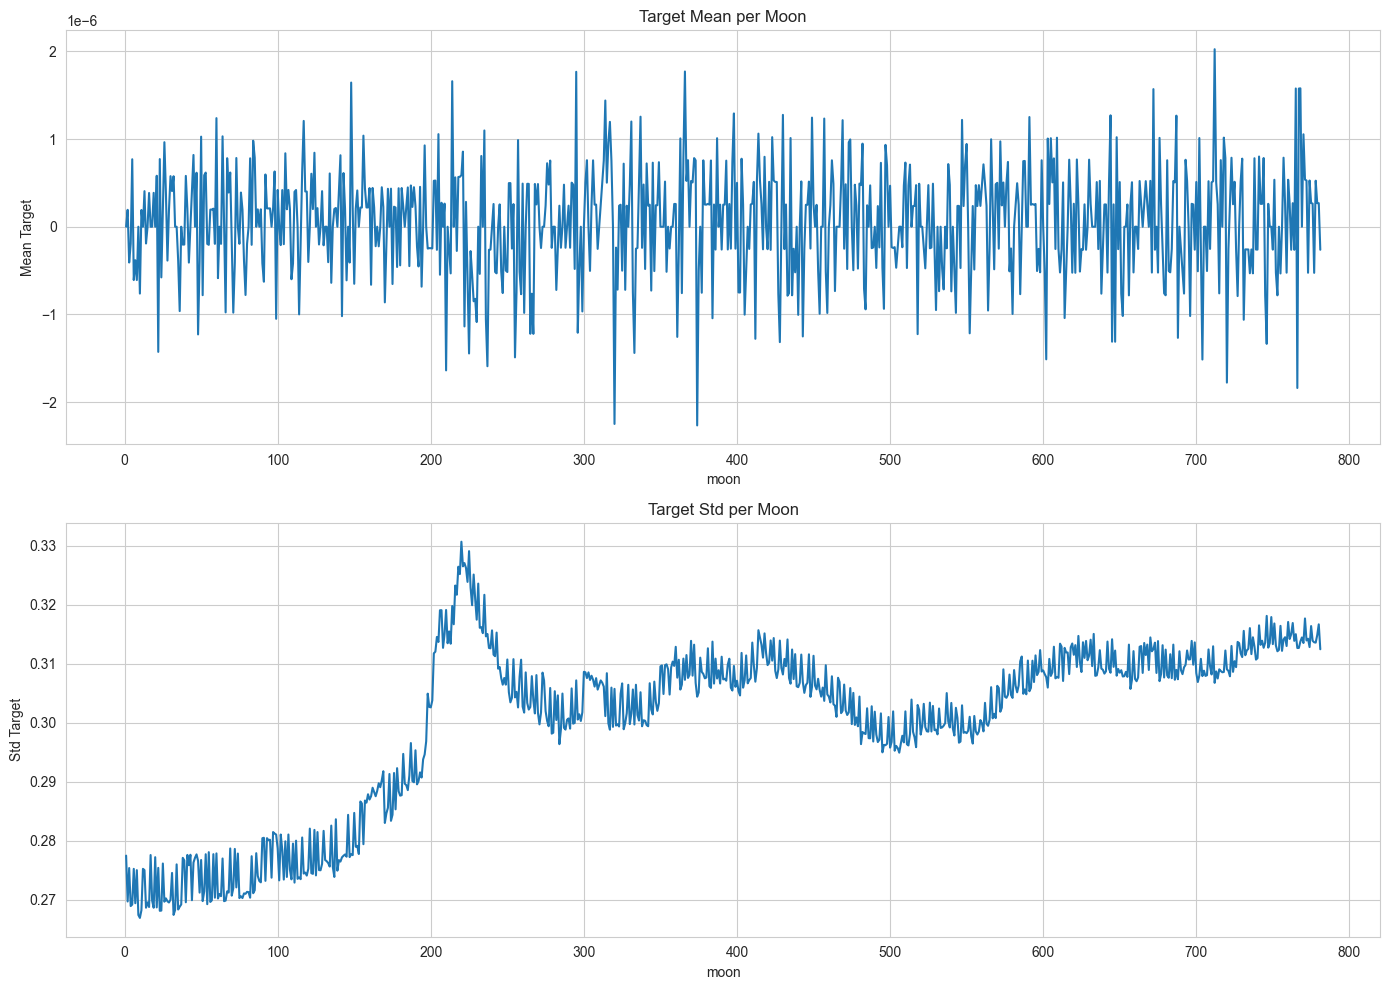

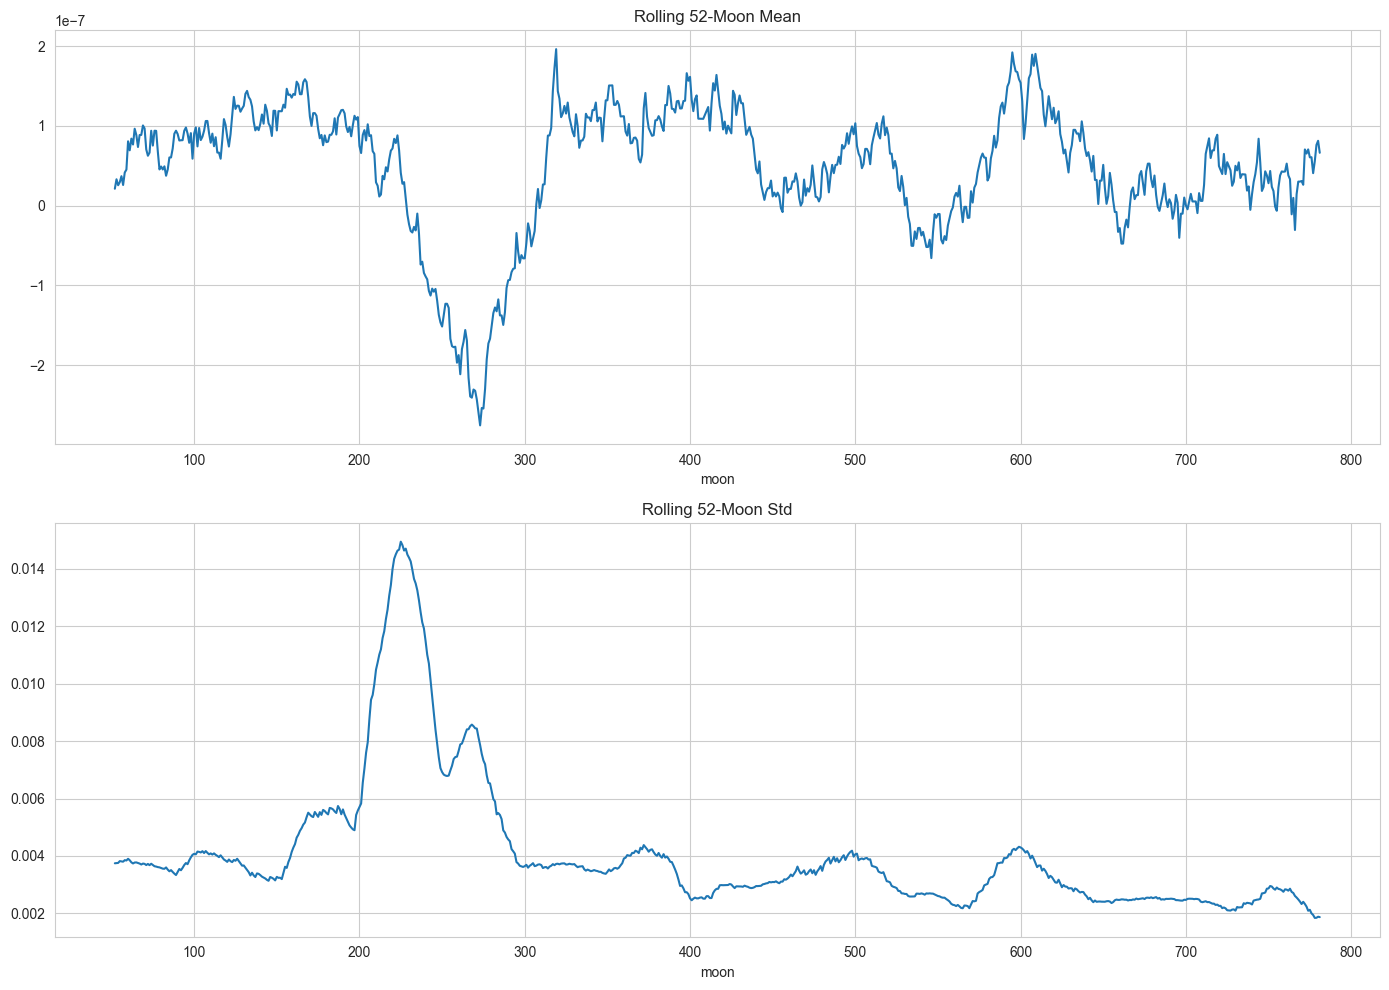

In [9]:
# Target Per Moon
moon_stats = df.groupby('moon')['target'].agg(['mean', 'std', 'count', 'min', 'max'])
print('Target Stats Per Moon (first 10):')
display(moon_stats.head(10))

# Plot mean & std over time
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

moon_stats['mean'].plot(ax=axes[0], title='Target Mean per Moon')
axes[0].set_ylabel('Mean Target')

moon_stats['std'].plot(ax=axes[1], title='Target Std per Moon')
axes[1].set_ylabel('Std Target')

plt.tight_layout()
plt.show()

# Rolling 52 (yearly)
moon_stats['mean_rolling'] = moon_stats['mean'].rolling(52).mean()
moon_stats['std_rolling'] = moon_stats['std'].rolling(52).std()

fig, axes = plt.subplots(2, 1, figsize=(14, 10))
moon_stats['mean_rolling'].plot(ax=axes[0], title='Rolling 52-Moon Mean')
moon_stats['std_rolling'].plot(ax=axes[1], title='Rolling 52-Moon Std')
plt.tight_layout()
plt.show()

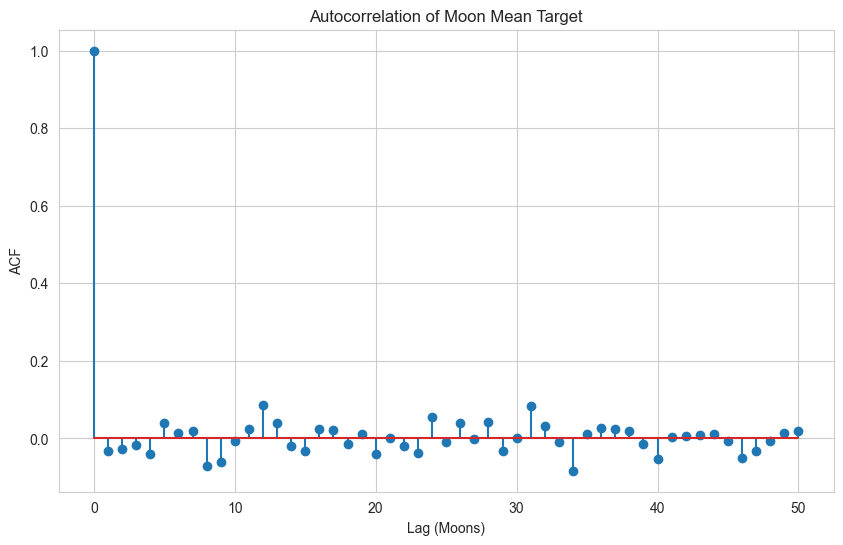

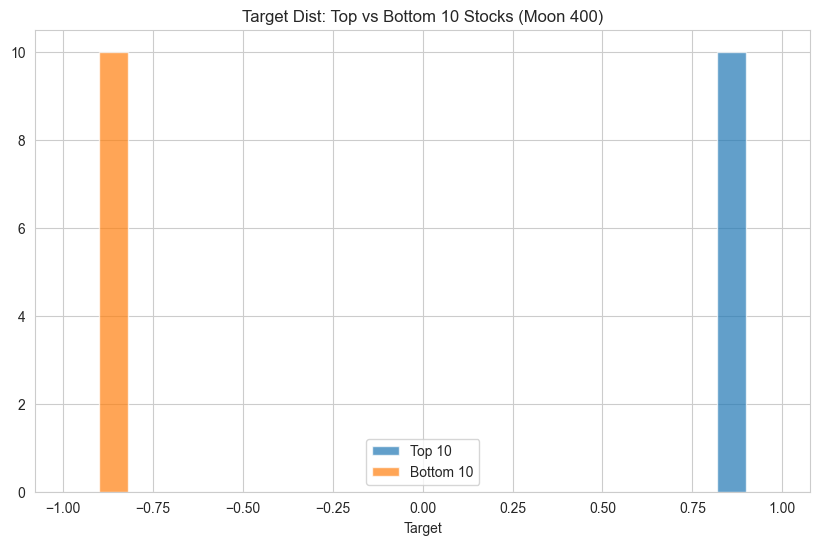

In [10]:
# Target Autocorrelation
from statsmodels.tsa.stattools import acf

acf_vals = acf(moon_stats['mean'], nlags=50)
plt.figure(figsize=(10, 6))
plt.stem(range(len(acf_vals)), acf_vals)
plt.title('Autocorrelation of Moon Mean Target')
plt.xlabel('Lag (Moons)')
plt.ylabel('ACF')
plt.show()

# Stock-level: Top/Bottom Performers (sample moon)
sample_moon = df[df.moon == 400].copy()  # Mid moon
top_10 = sample_moon.nlargest(10, 'target')
bottom_10 = sample_moon.nsmallest(10, 'target')

plt.figure(figsize=(10, 6))
plt.hist([top_10['target'], bottom_10['target']], bins=10, label=['Top 10', 'Bottom 10'], alpha=0.7)
plt.title(f'Target Dist: Top vs Bottom 10 Stocks (Moon {sample_moon.moon.iloc[0]})')
plt.xlabel('Target')
plt.legend()
plt.show()

# Features Deep Dive

In [11]:
# Features List
feat_cols = [c for c in df.columns if c.startswith('Feature_')]
print(f'Number of features: {len(feat_cols)}')
print('Feature columns:', feat_cols[:10], '...')

# Describe Features
feat_desc = df[feat_cols].describe().T
feat_desc['skew'] = df[feat_cols].skew()
feat_desc['kurtosis'] = df[feat_cols].kurtosis()
print('Features Describe (first 10):')
display(feat_desc.head(10))

Number of features: 1150
Feature columns: ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10'] ...
Features Describe (first 10):


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Feature_1,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186
Feature_2,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186
Feature_3,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186
Feature_4,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186
Feature_5,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186
Feature_6,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186
Feature_7,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186
Feature_8,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186
Feature_9,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186
Feature_10,1637276.0,0.499999,0.231955,0.0,0.33,0.5,0.67,1.0,-0.000004,-0.527186


# Verifying Feature Quantization

Confirm features are quantized into exactly 7 bins [0.0, 0.17, 0.33, 0.5, 0.67, 0.83, 1.0].

In [16]:
# Confirm Quantization
unique_vals = {}
for col in feat_cols[:50]:  # Sample 50
    unique_vals[col] = sorted(df[col].dropna().unique())

print('Unique values for first 5 features:')
for col, vals in list(unique_vals.items())[:5]:
    print(f'{col}: {vals} (count: {len(vals)})')

# Check all have 7
all_7 = all(len(v) == 7 for v in unique_vals.values())
print(f'All sampled features have exactly 7 unique values: {all_7}')

Unique values for first 5 features:
Feature_1: [np.float32(0.0), np.float32(0.17), np.float32(0.33), np.float32(0.5), np.float32(0.67), np.float32(0.83), np.float32(1.0)] (count: 7)
Feature_2: [np.float32(0.0), np.float32(0.17), np.float32(0.33), np.float32(0.5), np.float32(0.67), np.float32(0.83), np.float32(1.0)] (count: 7)
Feature_3: [np.float32(0.0), np.float32(0.17), np.float32(0.33), np.float32(0.5), np.float32(0.67), np.float32(0.83), np.float32(1.0)] (count: 7)
Feature_4: [np.float32(0.0), np.float32(0.17), np.float32(0.33), np.float32(0.5), np.float32(0.67), np.float32(0.83), np.float32(1.0)] (count: 7)
Feature_5: [np.float32(0.0), np.float32(0.17), np.float32(0.33), np.float32(0.5), np.float32(0.67), np.float32(0.83), np.float32(1.0)] (count: 7)
All sampled features have exactly 7 unique values: True


# Feature Distributions

Visualize bin distribution.

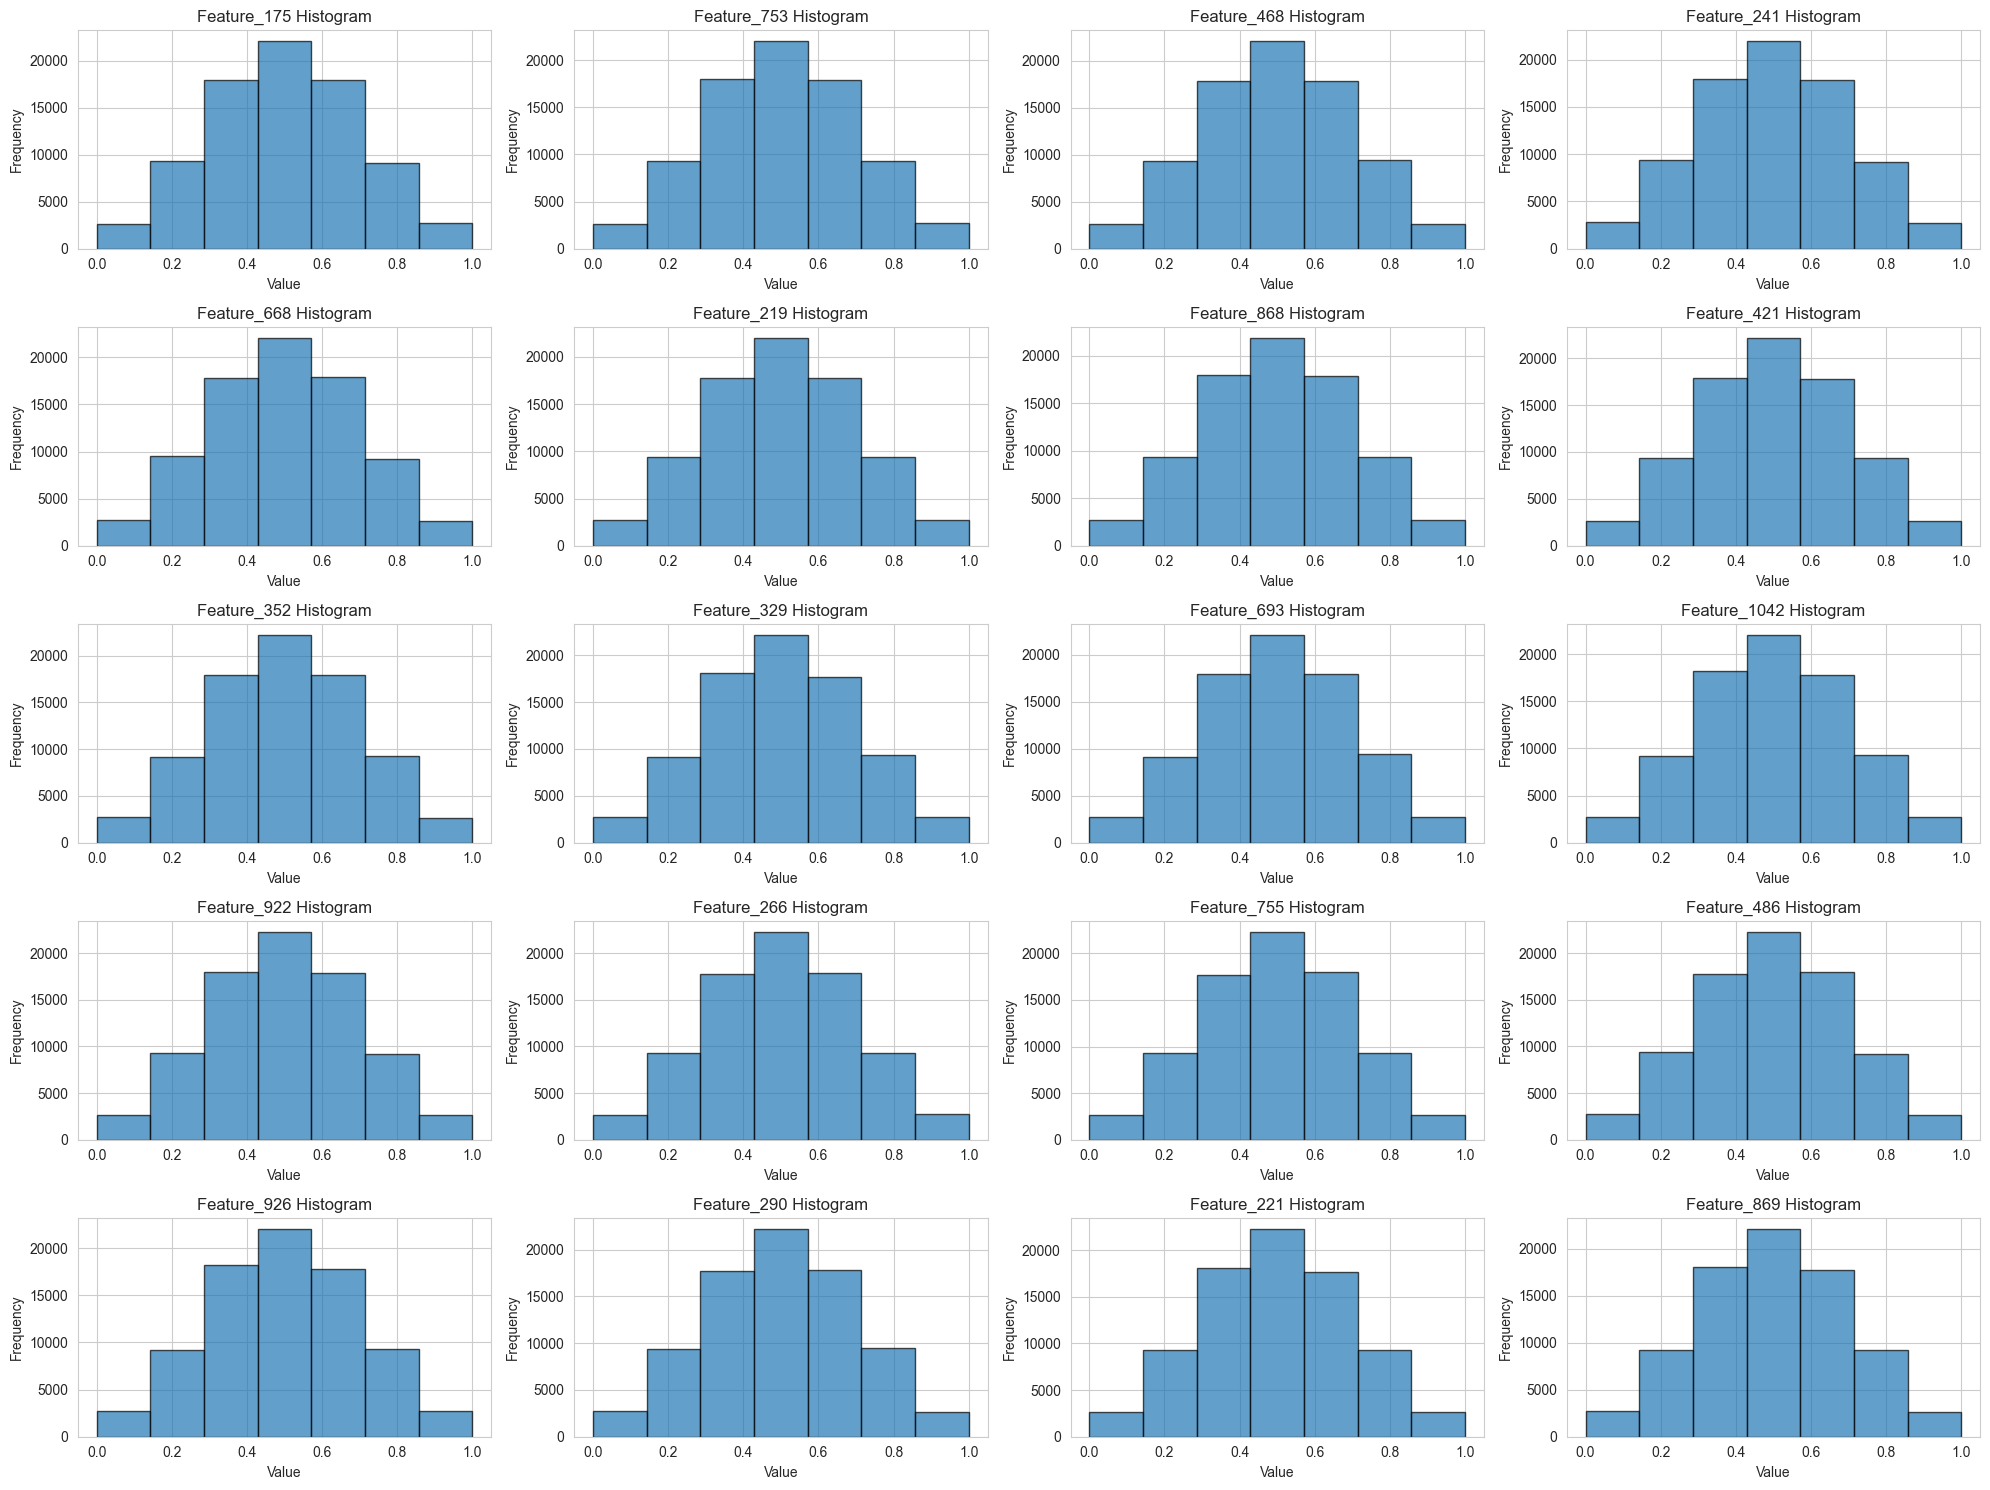

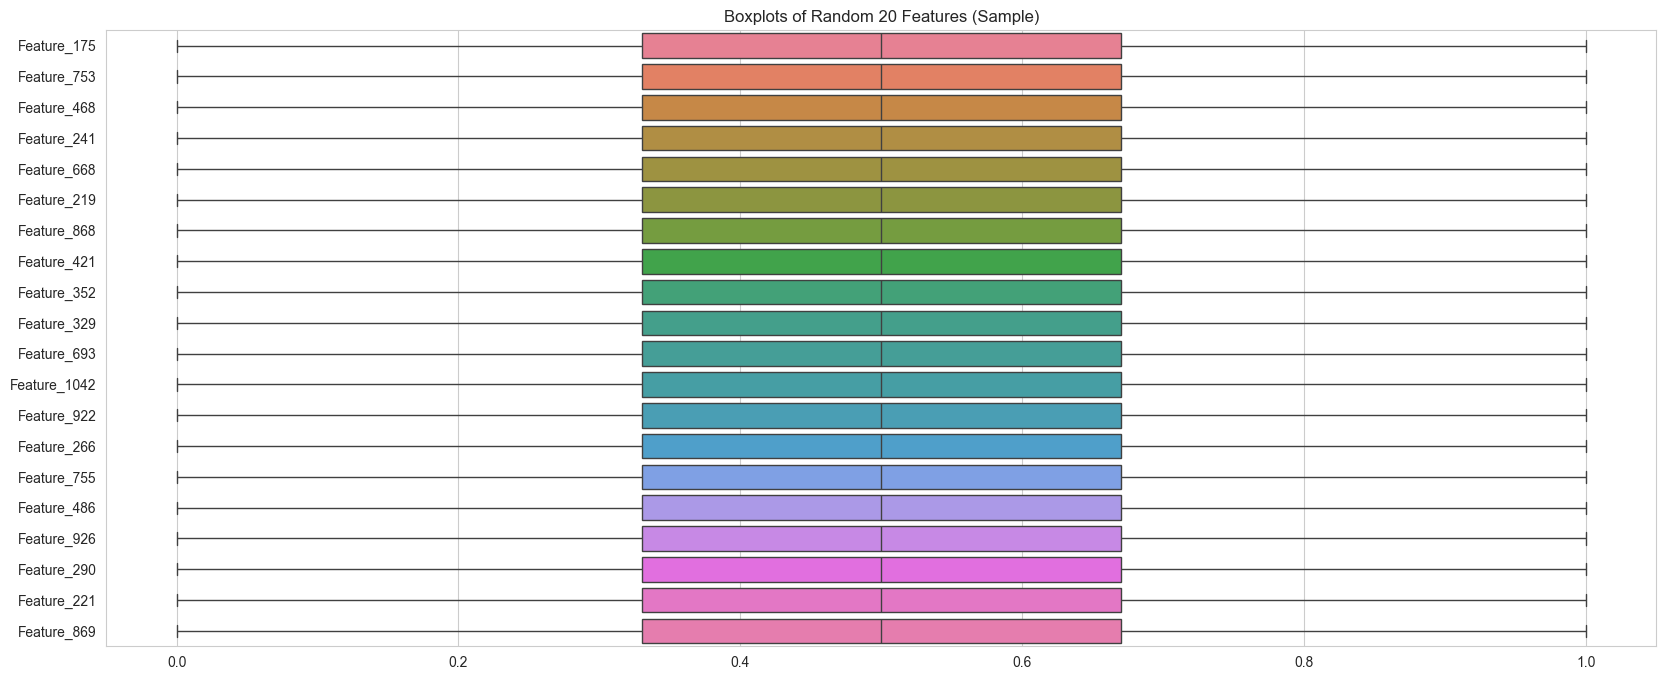

In [17]:
# Feature Distributions (Random 20)
np.random.seed(42)
rand_feats = np.random.choice(feat_cols, 20, replace=False)

fig, axes = plt.subplots(5, 4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(rand_feats):
    axes[i].hist(df_sample[col], bins=7, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Boxplots for all (subsampled)
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_sample[rand_feats], orient='h')
plt.title('Boxplots of Random 20 Features (Sample)')
plt.show()

# Feature Stability Over Time

Check if feature means/entropy change over moons. High variability suggests non-stationarity, requiring time-aware models to maintain Pearson stability.

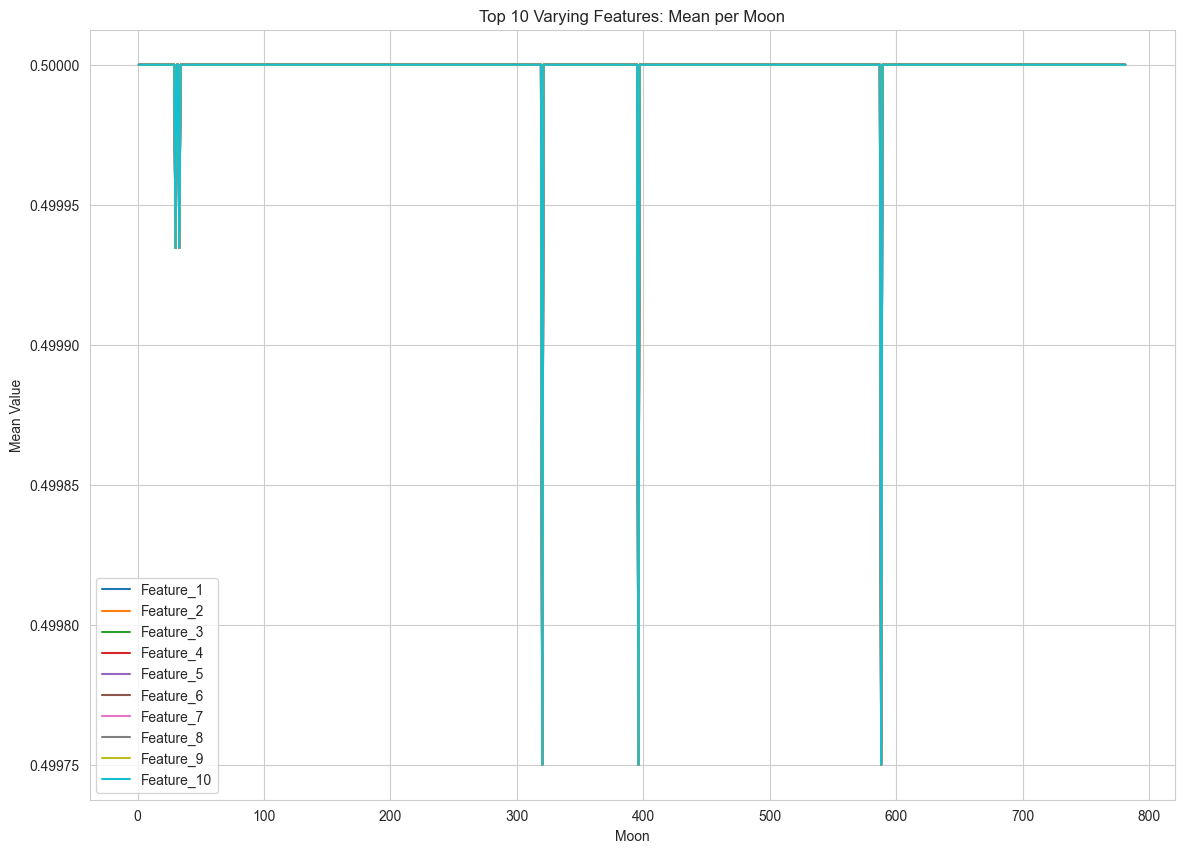

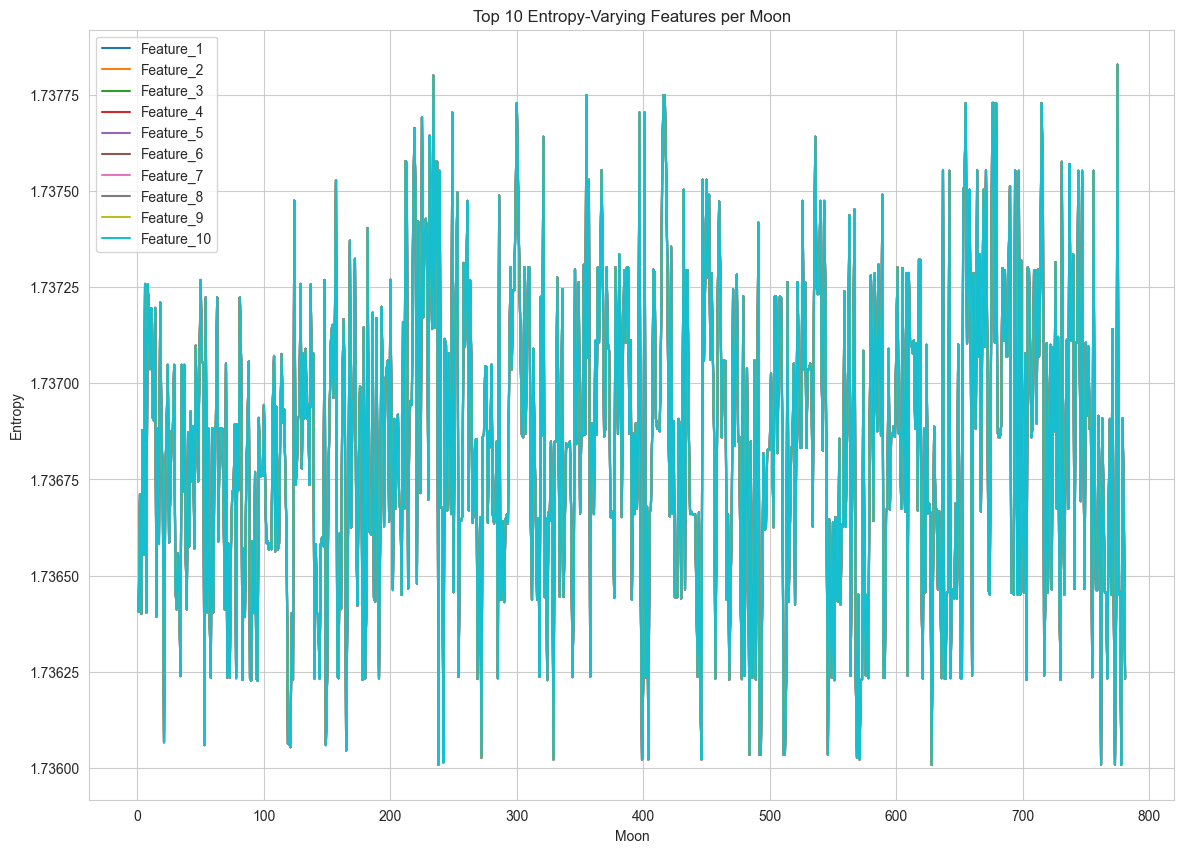

In [18]:
# Feature Stability Over Time (Means per Moon)
moon_feat_means = df.groupby('moon')[feat_cols].mean()

# Plot for top 10 varying features
feat_std = moon_feat_means.std()
top_varying = feat_std.nlargest(10).index

plt.figure(figsize=(14, 10))
for col in top_varying:
    plt.plot(moon_feat_means.index, moon_feat_means[col], label=col)

plt.title('Top 10 Varying Features: Mean per Moon')
plt.xlabel('Moon')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

# Entropy per feature per moon (discretized)
from scipy.stats import entropy

entropy_df = df.groupby('moon')[feat_cols].apply(lambda x: x.apply(lambda y: entropy(np.histogram(y.dropna(), bins=7, density=True)[0])))
entropy_std = entropy_df.std()
top_entropy_vary = entropy_std.nlargest(10).index

plt.figure(figsize=(14, 10))
for col in top_entropy_vary:
    plt.plot(entropy_df.index, entropy_df[col], label=col)

plt.title('Top 10 Entropy-Varying Features per Moon')
plt.xlabel('Moon')
plt.ylabel('Entropy')
plt.legend()
plt.show()

# Feature-Target Correlations

Measure relationships. Spearman for ordinal bins; weak correlations suggest non-linear models. Top features guide selection for maximizing Pearson.

Top 20 Positive Correlations:


Feature_295    0.012623
Feature_83     0.012117
Feature_555    0.011799
Feature_918    0.011743
Feature_296    0.011740
Feature_896    0.011445
Feature_915    0.011437
Feature_910    0.011375
Feature_82     0.011255
Feature_907    0.011213
Feature_561    0.010989
Feature_908    0.010820
Feature_345    0.010663
Feature_562    0.010487
Feature_906    0.010485
Feature_902    0.010481
Feature_900    0.010452
Feature_901    0.010327
Feature_685    0.010273
Feature_899    0.010255
Name: target, dtype: float64

Top 20 Negative Correlations:


Feature_759   -0.009723
Feature_927   -0.009931
Feature_740   -0.009990
Feature_84    -0.010150
Feature_754   -0.010424
Feature_5     -0.016347
Feature_7     -0.016979
Feature_48    -0.017059
Feature_47    -0.017189
Feature_6     -0.017245
Feature_49    -0.017339
Feature_87    -0.017569
Feature_4     -0.018490
Feature_46    -0.019120
Feature_45    -0.019180
Feature_44    -0.019349
Feature_3     -0.019359
Feature_2     -0.019524
Feature_43    -0.019605
Feature_1     -0.019671
Name: target, dtype: float64

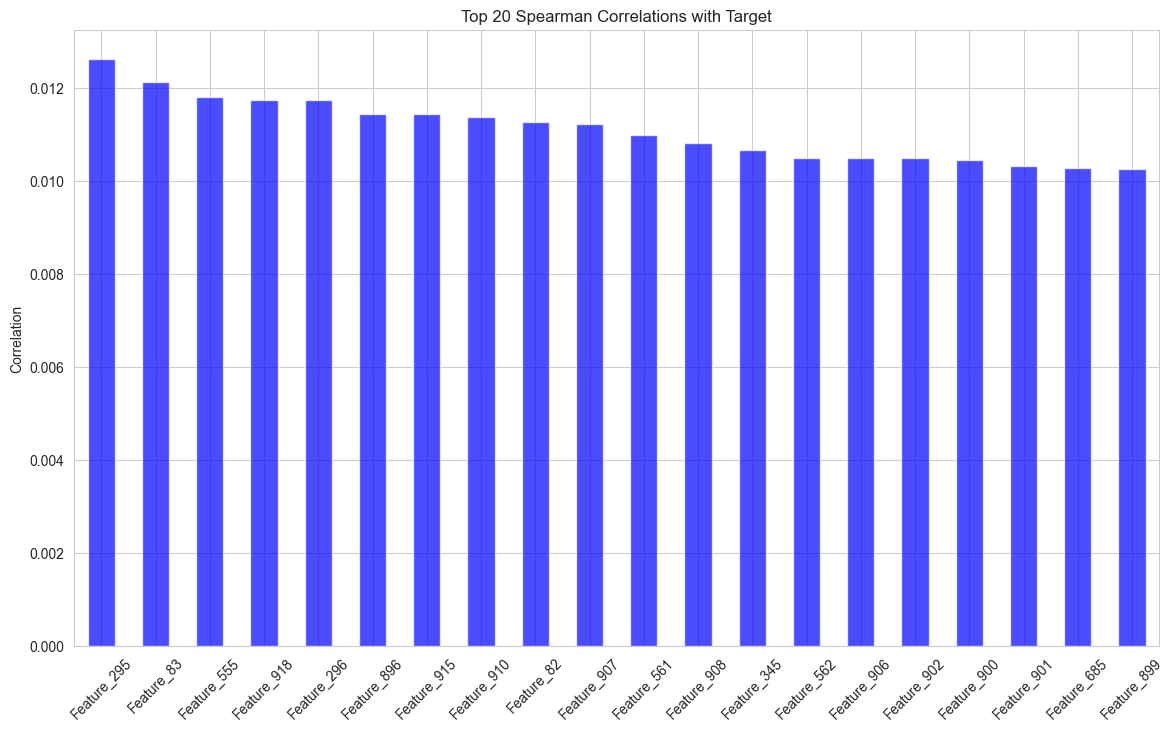

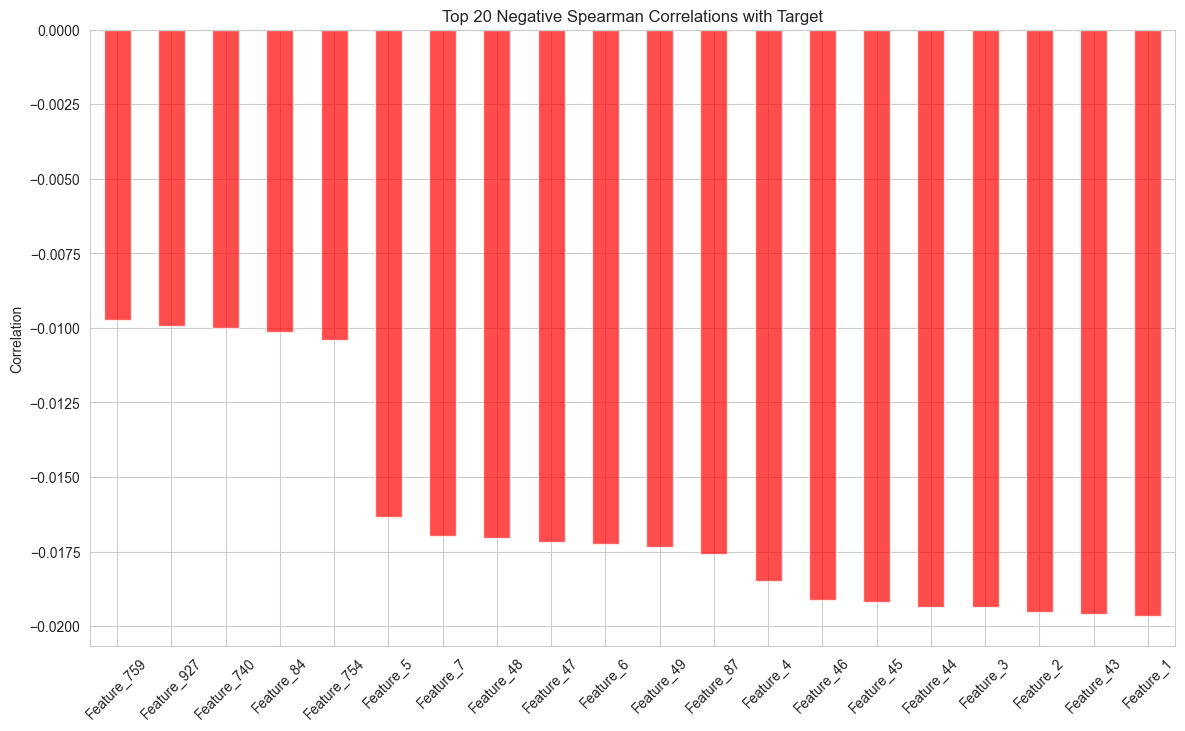

In [19]:
# Spearman Correlations with Target
corrs = df_sample[feat_cols + ['target']].corr(method='spearman')['target'].drop('target').sort_values(ascending=False)
print('Top 20 Positive Correlations:')
display(corrs.head(20))

print('Top 20 Negative Correlations:')
display(corrs.tail(20))

# Barplot
plt.figure(figsize=(14, 8))
corrs.head(20).plot(kind='bar', color='blue', alpha=0.7)
plt.title('Top 20 Spearman Correlations with Target')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
corrs.tail(20).plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 20 Negative Spearman Correlations with Target')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.show()

# Violin Plots by Feature Bins

Show target distribution per bin.

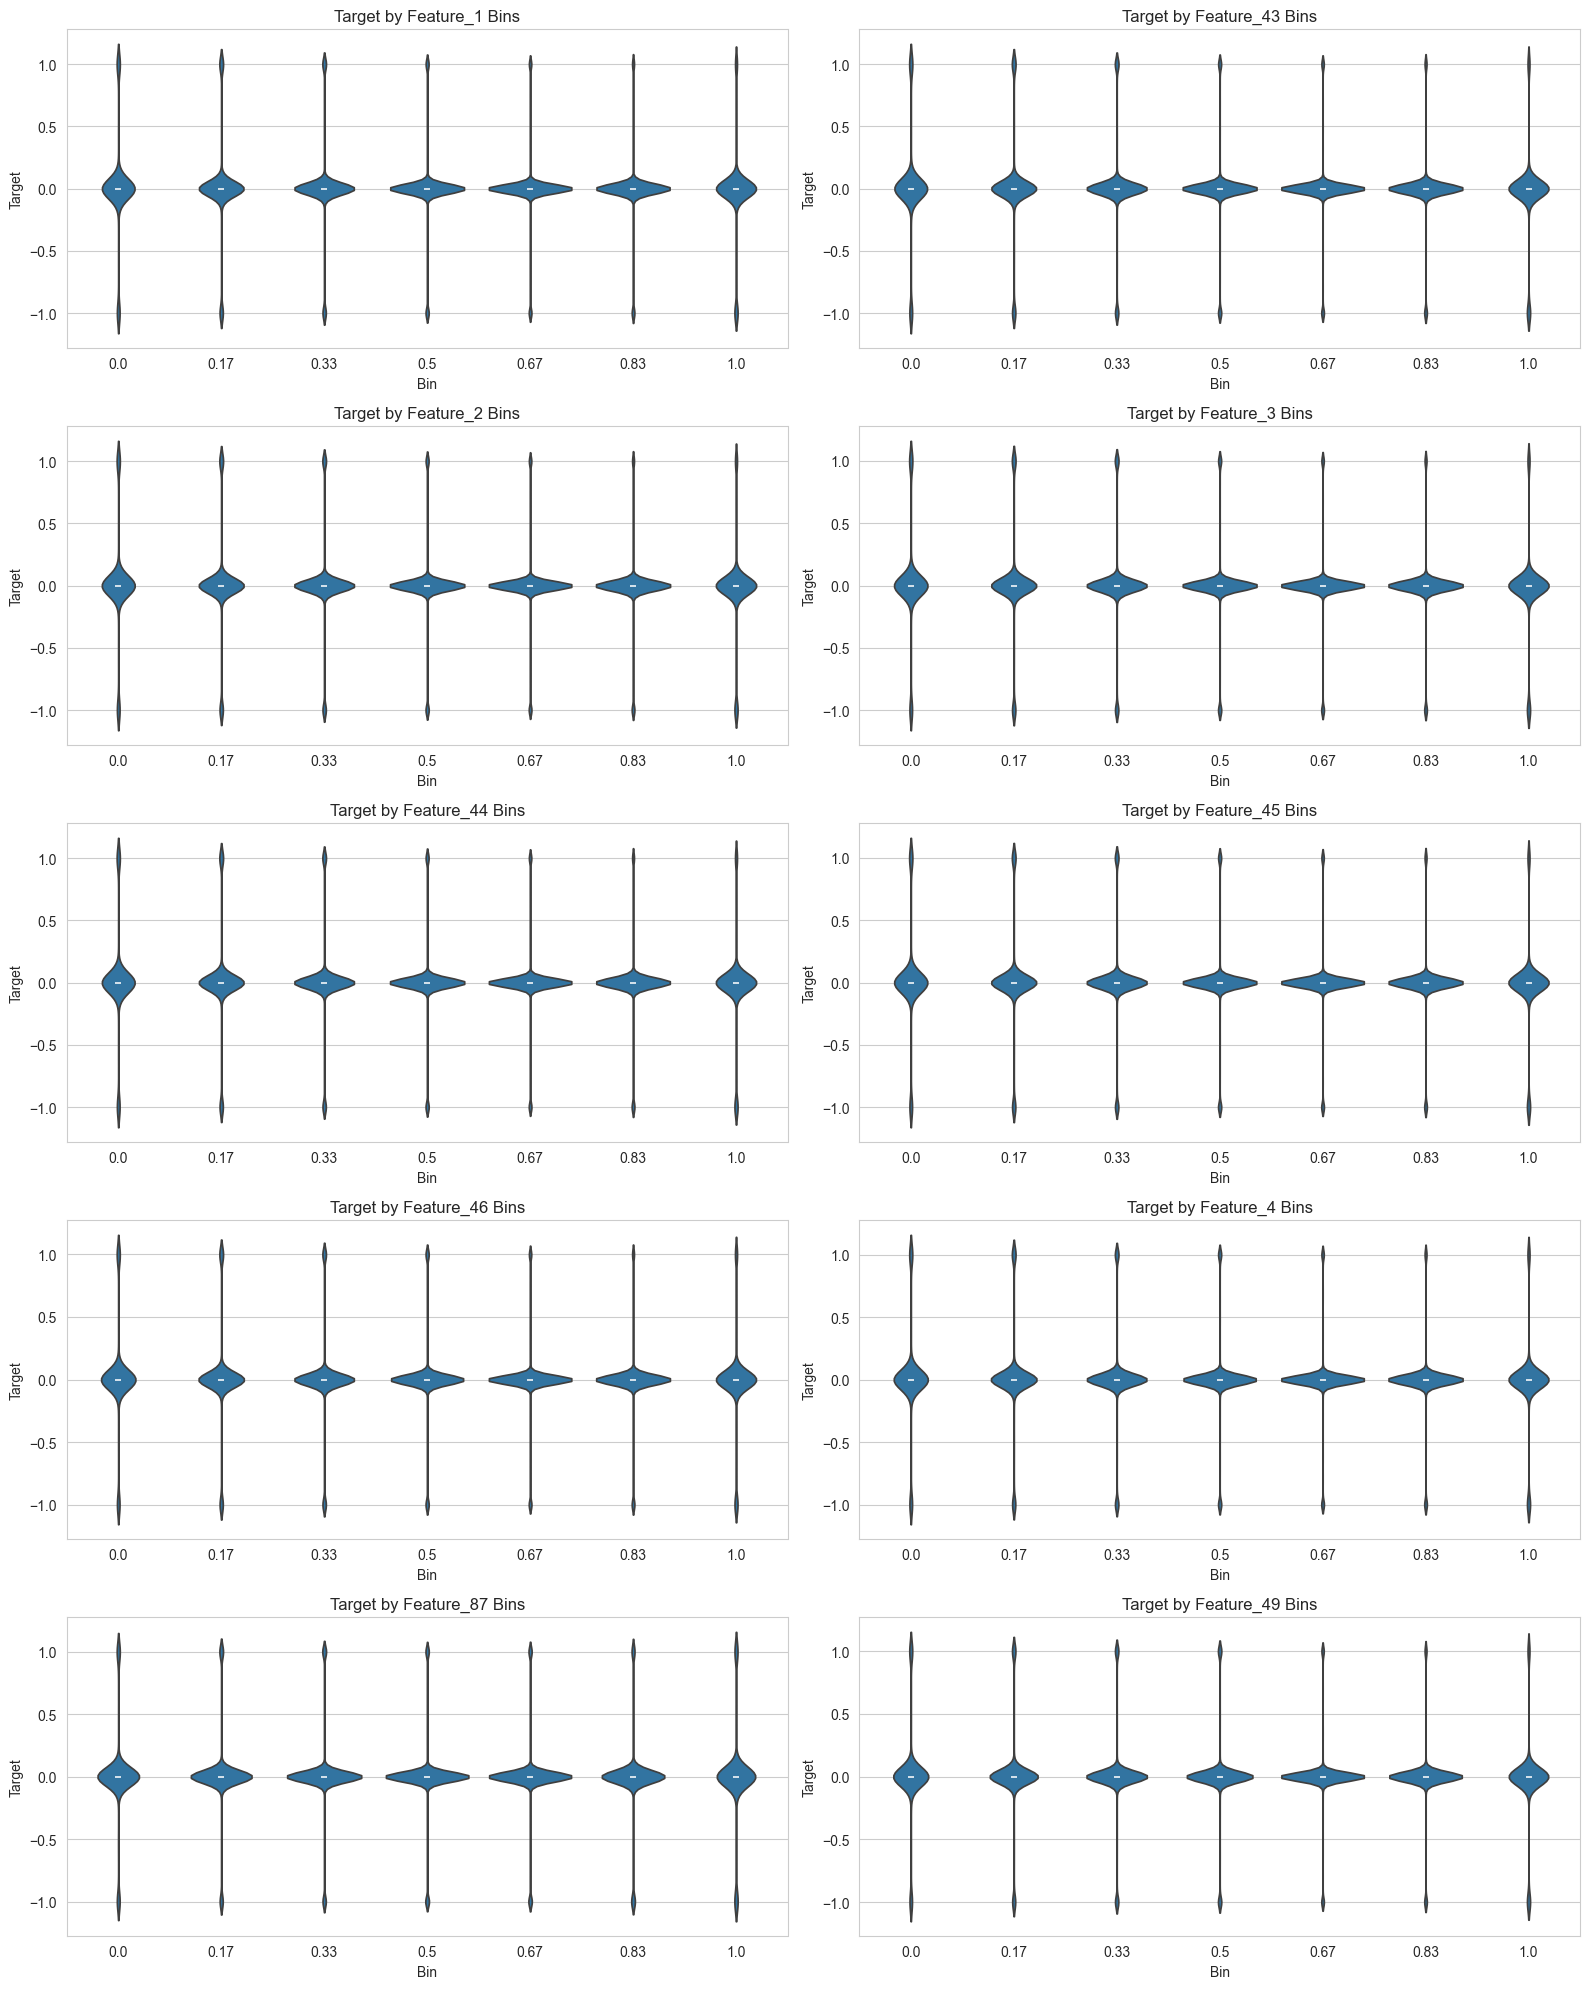

In [20]:
# Violin Plots: Target by Feature Bins (Top 10 Corrs)
top_corr_cols = corrs.abs().nlargest(10).index

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(top_corr_cols):
    sns.violinplot(x=df_sample[col], y=df_sample['target'], ax=axes[i])
    axes[i].set_title(f'Target by {col} Bins')
    axes[i].set_xlabel('Bin')
    axes[i].set_ylabel('Target')

plt.tight_layout()
plt.show()

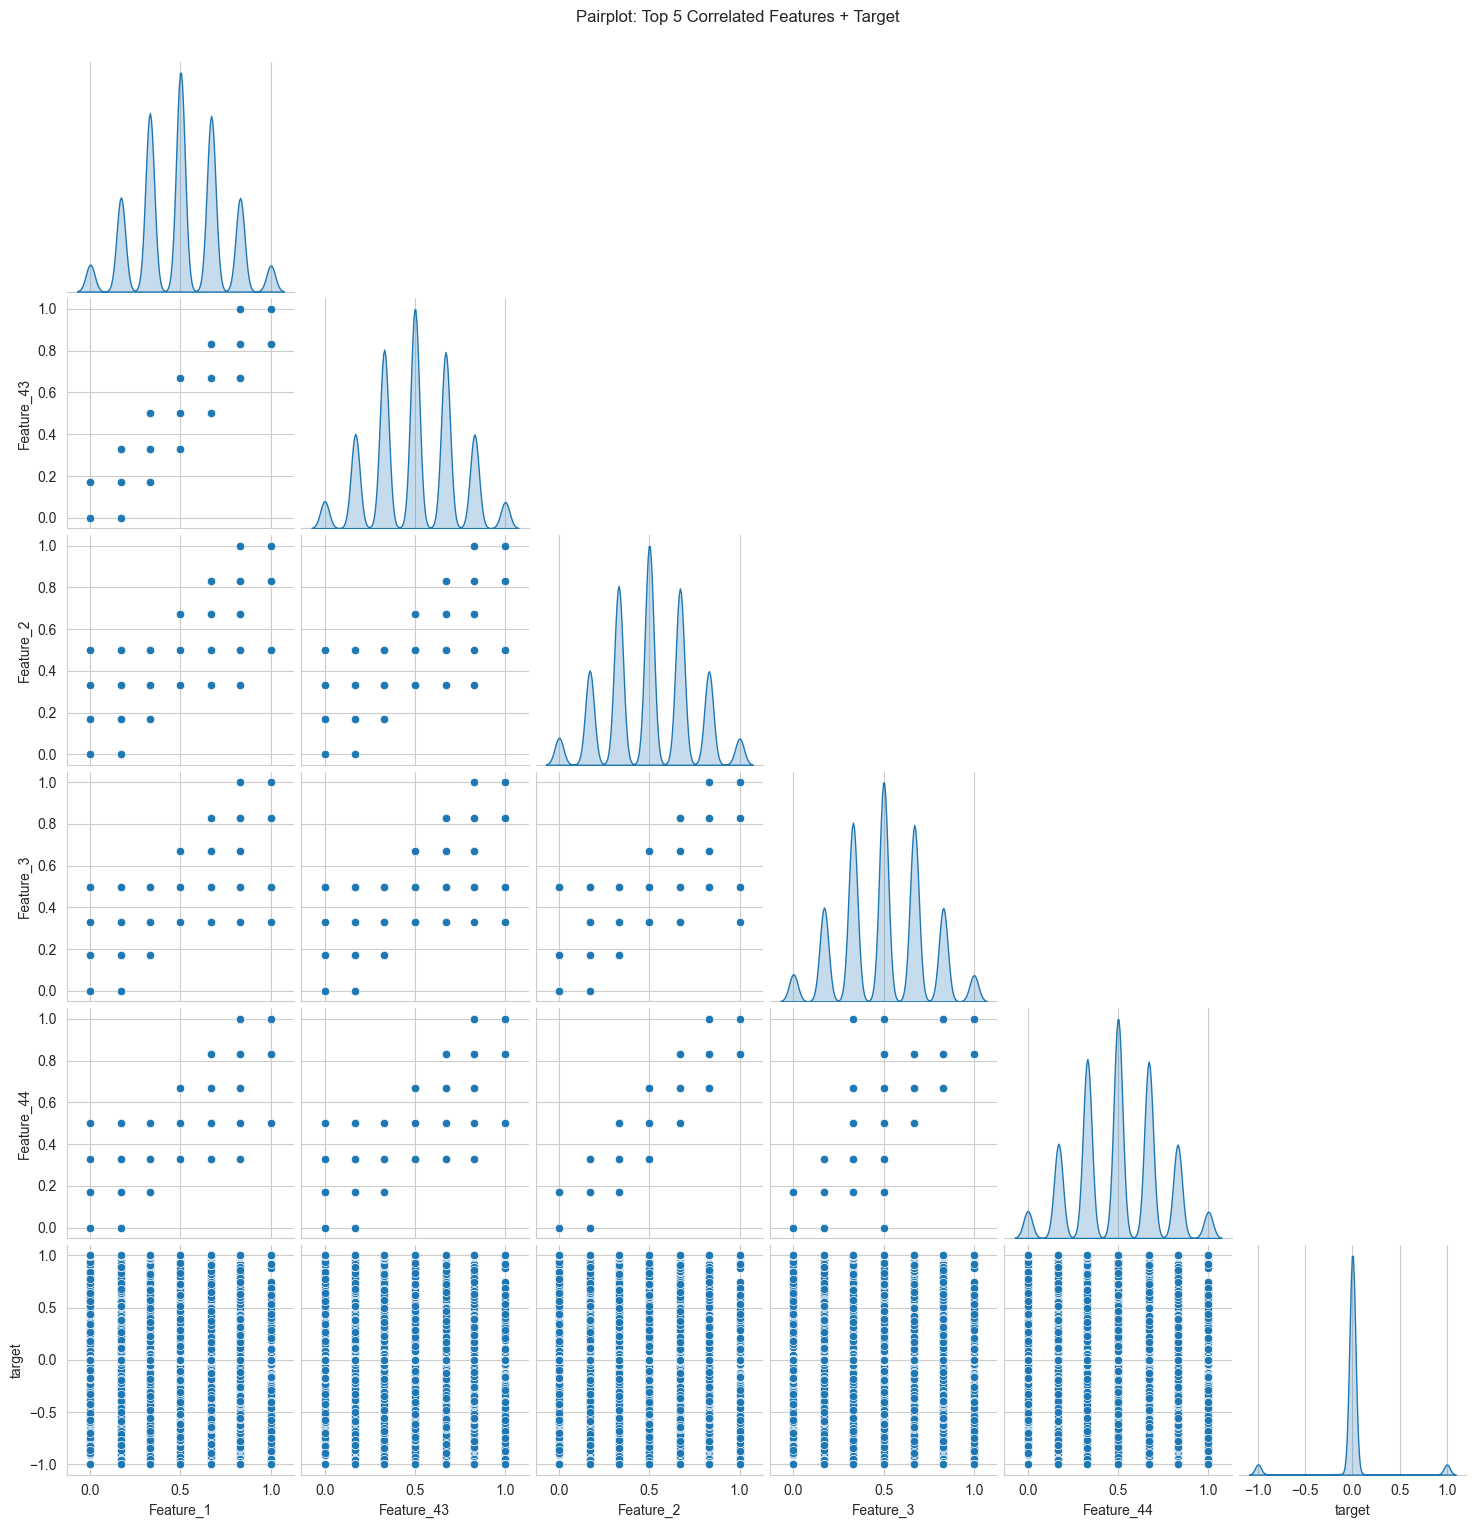

In [21]:
# Pairplot Sample (Top 5 Corrs + Target)
top_5 = corrs.abs().nlargest(5).index
pair_cols = list(top_5) + ['target']

sns.pairplot(df_sample[pair_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairplot: Top 5 Correlated Features + Target', y=1.02)
plt.show()

# Feature-Feature Correlations

Identify multicollinearity. High corr may cause instability in linear models, affecting Pearson. Clustering reveals feature groups.

<Figure size 1200x1000 with 0 Axes>

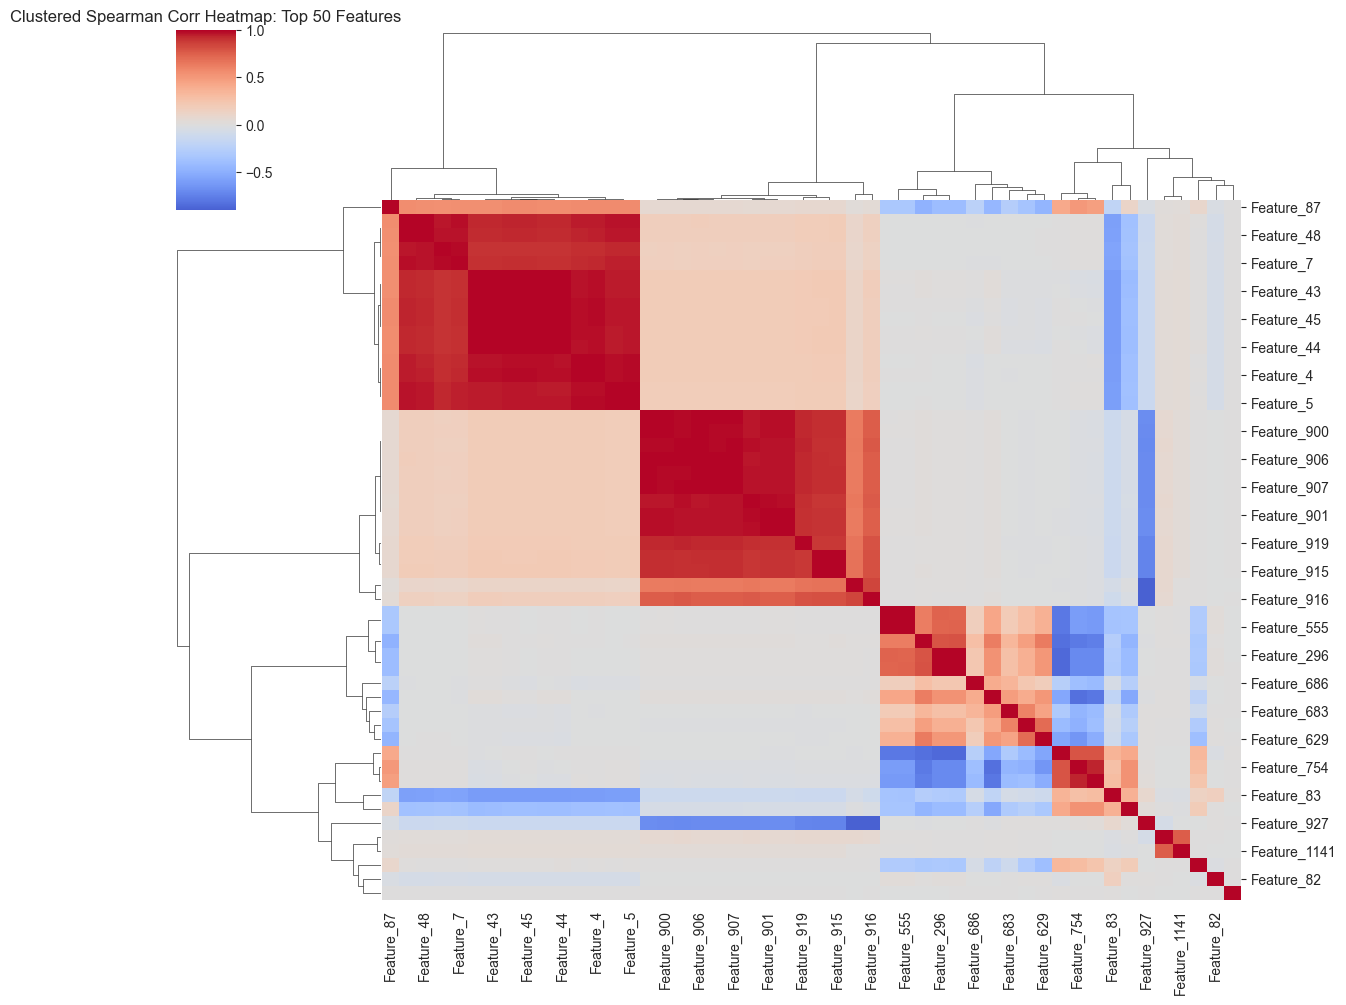

In [22]:
# Feature-Feature Correlations (Top 50)
top_50 = corrs.abs().nlargest(50).index
feat_corr = df_sample[top_50].corr(method='spearman')

# Heatmap with clustering
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

dist = pdist(feat_corr, metric='euclidean')
link = linkage(dist, method='ward')

plt.figure(figsize=(12, 10))
sns.clustermap(feat_corr, cmap='coolwarm', center=0, figsize=(12, 10), row_linkage=link, col_linkage=link)
plt.title('Clustered Spearman Corr Heatmap: Top 50 Features')
plt.show()

# Mutual Information

Measure non-linear dependencies. Higher MI than corr suggests non-linear models for better Pearson.

Top 20 Mutual Info Scores:


Feature_999     0.037846
Feature_1061    0.037033
Feature_524     0.036737
Feature_529     0.035448
Feature_383     0.033302
Feature_241     0.031956
Feature_993     0.031089
Feature_478     0.031028
Feature_244     0.030700
Feature_1067    0.030243
Feature_237     0.030212
Feature_381     0.029630
Feature_239     0.029630
Feature_1065    0.029618
Feature_477     0.029425
Feature_479     0.028754
Feature_1066    0.028507
Feature_578     0.028284
Feature_527     0.027913
Feature_242     0.027608
dtype: float64

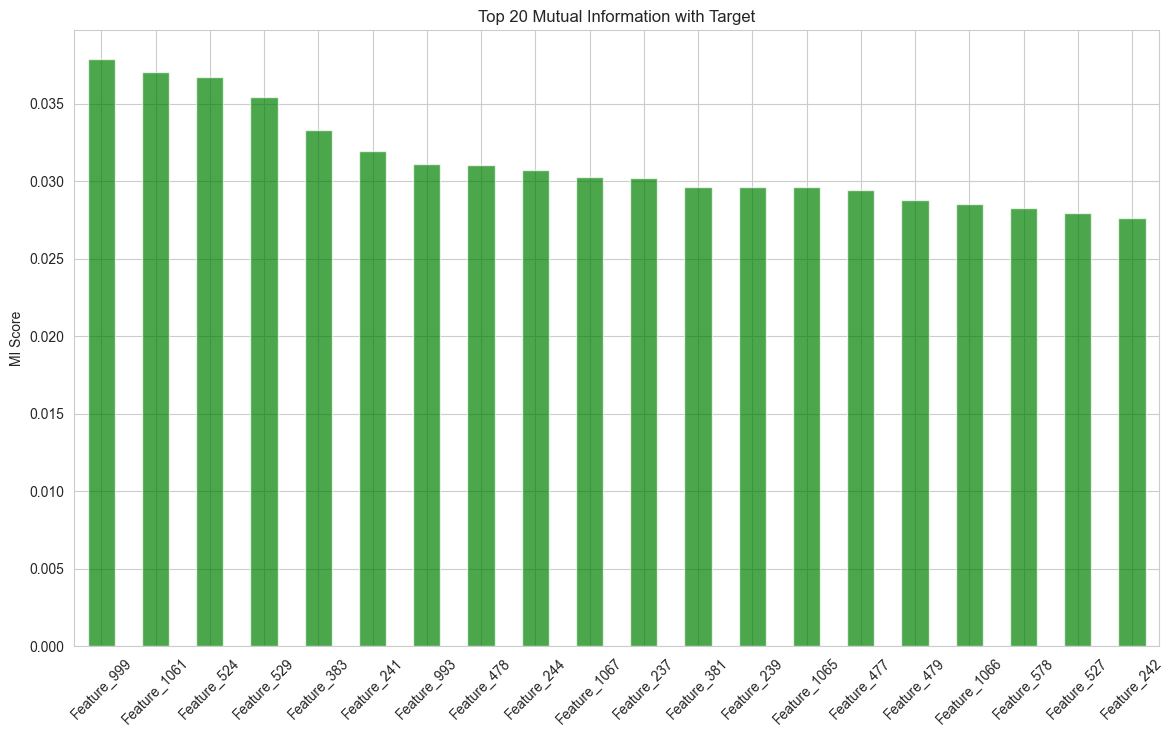

In [23]:
# Mutual Information (Discretized)
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import KBinsDiscretizer

# Discretize features
discretizer = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')
X_disc = discretizer.fit_transform(df_sample[feat_cols])

mi_scores = mutual_info_regression(X_disc, df_sample['target'])
mi_df = pd.Series(mi_scores, index=feat_cols).sort_values(ascending=False)

print('Top 20 Mutual Info Scores:')
display(mi_df.head(20))

# Plot
plt.figure(figsize=(14, 8))
mi_df.head(20).plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 20 Mutual Information with Target')
plt.ylabel('MI Score')
plt.xticks(rotation=45)
plt.show()

# Universe Size and Turnover

Track stock count per moon and turnover (id changes). High turnover confirms ids are not persistent.

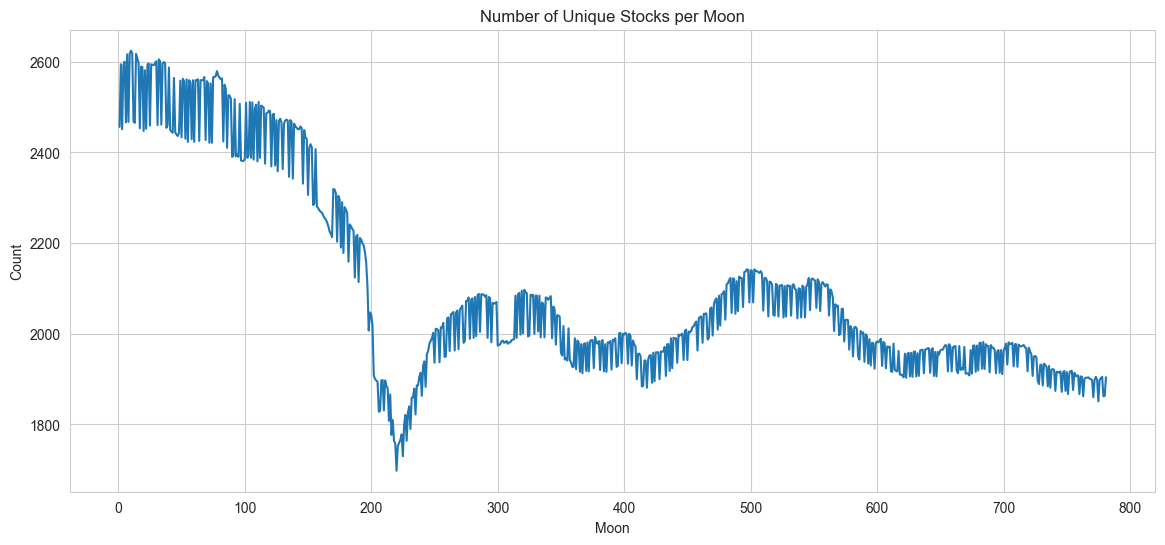

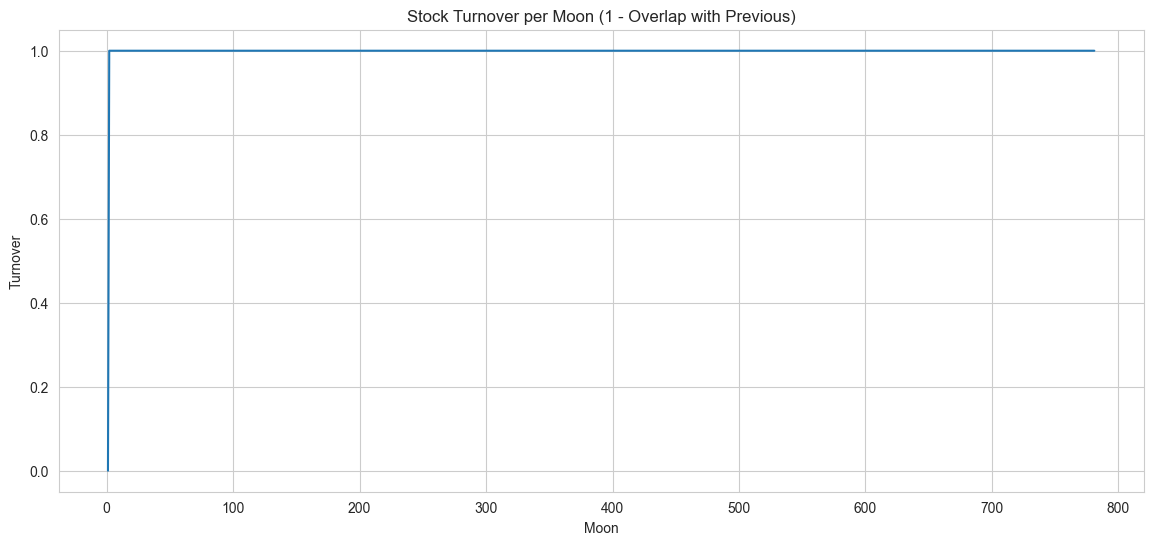

In [24]:
# Universe Size Over Time
universe_size = df.groupby('moon')['id'].nunique()

plt.figure(figsize=(14, 6))
universe_size.plot()
plt.title('Number of Unique Stocks per Moon')
plt.xlabel('Moon')
plt.ylabel('Count')
plt.show()

# Id Turnover
moons = sorted(df.moon.unique())
turnover = []
prev_ids = set()

for moon in moons:
    curr_ids = set(df[df.moon == moon]['id'])
    if prev_ids:
        overlap = len(curr_ids & prev_ids) / len(curr_ids)
        turnover.append(1 - overlap)
    else:
        turnover.append(0)
    prev_ids = curr_ids

plt.figure(figsize=(14, 6))
plt.plot(moons, turnover)
plt.title('Stock Turnover per Moon (1 - Overlap with Previous)')
plt.xlabel('Moon')
plt.ylabel('Turnover')
plt.show()